In [1]:
import random

import SimLight as sl
import SimLight.plottools as slpl

SimLight 0.0.3



In [2]:
# unit
m = 1
cm = 1e-2
mm = 1e-3
µm = 1e-6
nm = 1e-9

In [3]:
wavelength = 0.550 * µm
size = 5 * mm
N = 1000  # pixel number
f = 10 * mm
z = 10 * mm
j = 15  # zernike orders
random.seed(20201028)

In [4]:
F = sl.PlaneWave(wavelength, size, N)
Z = sl.zernike.ZernikeCoefficients(j)
for i in range(j):
    Z.coefficients[i] = random.uniform(-.02, .02)

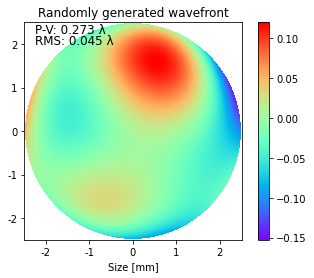

In [5]:
F = sl.aberration(F, Z)
F = sl.circle_aperture(F)
F.plot_wavefront(mask_r=1, title='Randomly generated wavefront')

In [6]:
solved_coeffs = sl.zernike_coeffs(F, j)

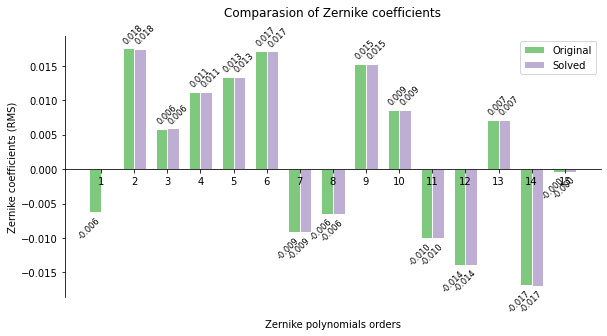

In [7]:
slpl.plot_zernike_coeffs(Z.coefficients, solved_coeffs, labels=['Original', 'Solved'], title='Comparasion of Zernike coefficients')

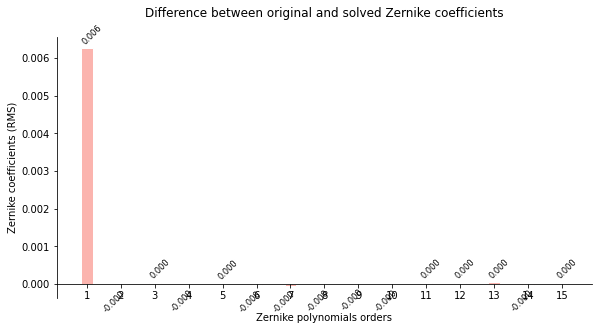

In [8]:
slpl.plot_zernike_coeffs(solved_coeffs - Z.coefficients, title='Difference between original and solved Zernike coefficients')